In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta

import numpy.random as npr
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy as sp
import seaborn as sns

#%matplotlib widget
%matplotlib inline

In [2]:
province    = pd.read_csv('../dati-province/dpc-covid19-ita-province.csv')
regioni     = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni.csv')
italia      = pd.read_csv('../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
Popolazione = pd.read_csv('Popolazione_Regioni.csv', names=('provincia','sigla', 'popolazione'))
province

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97412,2021-12-25T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,100471,NaN,ITH,ITH3,ITH35
97413,2021-12-25T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,119321,NaN,ITH,ITH3,ITH36
97414,2021-12-25T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,20391,NaN,ITH,ITH3,ITH37
97415,2021-12-25T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,6963,NaN,ITH,ITH3,NaN


In [3]:
today = datetime.today().strftime('%d/%m/%Y')
yesterday = (date.today() - timedelta(days=1)).strftime('%d/%m/%Y')
idx = pd.date_range('2020-02-24', yesterday)

italia['data']                             = pd.to_datetime(italia['data'],format='%Y-%m-%dT%H:%M:%S',yearfirst=True, dayfirst=True)
italia['new_date']                         = italia['data'].dt.date
italia                                     = italia.set_index('new_date')
italia.sort_index(inplace=True)
italia                                     = italia.reindex(idx)
italia.index                               = italia.index.strftime('%d/%m/%Y')

italia.variazione_totale_positivi.fillna(0,inplace=True)
italia.nuovi_positivi.fillna(            0,inplace=True)
italia.ingressi_terapia_intensiva.fillna(0,inplace=True)
italia.data.fillna(0,inplace=True)
italia.fillna(                           method='ffill',inplace=True)

italia['casi_giornalieri']                 = italia['totale_casi'] - italia['totale_casi'].shift(1)
italia['media_casi_giorn']                 = italia['casi_giornalieri'].rolling(window=7, min_periods=1).mean()
italia['morti_giornalieri']                = italia['deceduti'] - italia['deceduti'].shift(1)
italia['media_morti_giorn']                = italia['morti_giornalieri'].rolling(window=7, min_periods=1).mean()
italia['media_ingressi_terapia_intensiva'] = italia['ingressi_terapia_intensiva'].rolling(window=7, min_periods=1).mean()
italia

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,casi_giornalieri,media_casi_giorn,morti_giornalieri,media_morti_giorn,media_ingressi_terapia_intensiva
24/02/2020,2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25/02/2020,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,...,NaN,NaN,NaN,NaN,NaN,93.0,93.000000,3.0,3.000000,0.000000
26/02/2020,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,...,NaN,NaN,NaN,NaN,NaN,78.0,85.500000,2.0,2.500000,0.000000
27/02/2020,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,...,NaN,NaN,NaN,NaN,NaN,250.0,140.333333,5.0,3.333333,0.000000
28/02/2020,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,...,NaN,NaN,NaN,NaN,NaN,238.0,164.750000,4.0,3.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21/12/2021,2021-12-21 17:00:00,ITA,8381,1012,9393,374751,384144,14441,30798,4916068,...,NaN,5153722.0,282421.0,70810613.0,60747210.0,30783.0,25322.428571,153.0,126.000000,85.285714
22/12/2021,2021-12-22 17:00:00,ITA,8544,1010,9554,393175,402729,18585,36293,4933663,...,NaN,5179314.0,293155.0,71055692.0,61281434.0,36326.0,27199.000000,146.0,128.428571,86.428571
23/12/2021,2021-12-23 17:00:00,ITA,8722,1023,9745,420284,430029,27300,44595,4950780,...,NaN,5211207.0,305847.0,71317437.0,61921139.0,44585.0,29839.142857,168.0,134.857143,85.285714
24/12/2021,2021-12-24 17:00:00,ITA,8812,1038,9850,450824,460674,30645,50599,4970584,...,NaN,5246587.0,321057.0,71595127.0,62573224.0,50590.0,32978.428571,141.0,137.857143,89.857143


In [46]:
today = datetime.today().strftime('%d/%m/%Y')
yesterday = (date.today() - timedelta(days=1)).strftime('%d/%m/%Y')
idx = pd.date_range('24/02/2020', today)

NomiProvince  = province.denominazione_provincia.unique()
NomiProvince.sort()
Popolazione['provincia'] = NomiProvince
Popolazione = Popolazione.set_index('provincia')

#create a data frame dictionary to store your data frames
Province = {elem : pd.DataFrame for elem in NomiProvince}
for key in Province.keys():
    Province[key] = province[:][province.denominazione_provincia == key]
    Province[key]['data']                  = pd.to_datetime(Province[key]['data'])
    Province[key]['data']                  = Province[key]['data'].dt.strftime('%d/%m/%Y')
    Province[key]['casi_giornalieri']      = Province[key]['totale_casi'] - Province[key]['totale_casi'].shift(1)
    Province[key]['media_casi_giorn']      = Province[key]['casi_giornalieri'].rolling(window=7, min_periods=1).mean()
    Province[key]['casi_giornalieri_norm'] = Province[key]['casi_giornalieri'] / Popolazione.at[key,'popolazione'] * 1e5
    Province[key]['media_casi_giorn_norm'] = Province[key]['media_casi_giorn'] / Popolazione.at[key,'popolazione'] * 1e5

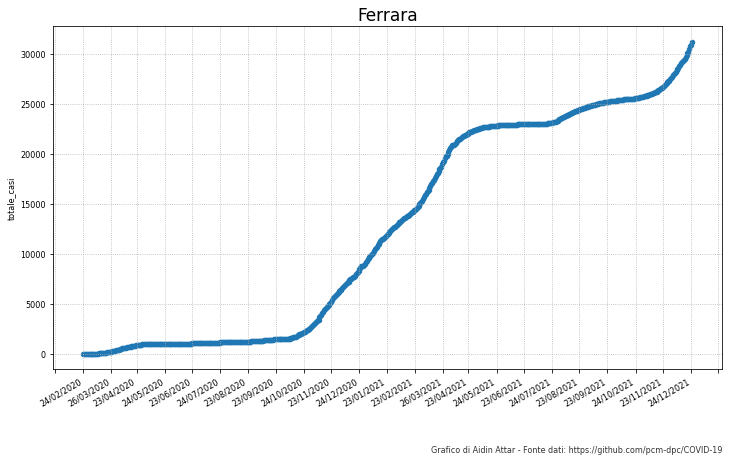

In [47]:
fig, ax = plt.subplots(figsize=(12, 7))

Province['Ferrara'].plot(ax = ax, x ='data', y='totale_casi',
                         kind = 'scatter', title = "Ferrara",
                         xlabel = '')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Ferrara', fontsize=17)
ax.grid(linestyle='dotted')
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

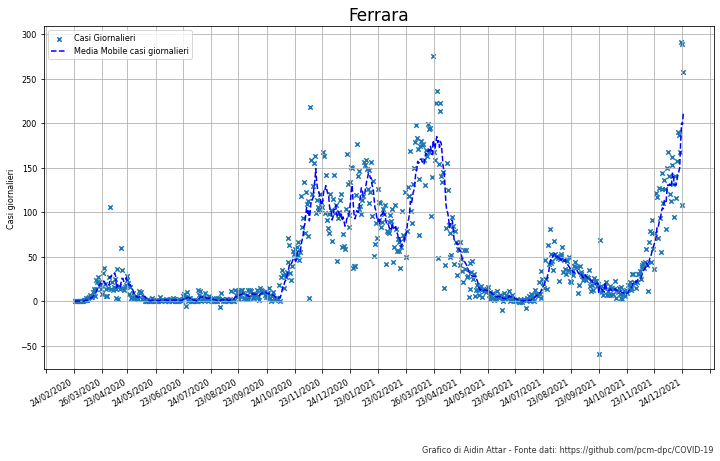

In [48]:
fig, ax = plt.subplots(figsize=(12, 7))

Province['Ferrara'].plot(ax = ax, x ='data', y='casi_giornalieri',
             kind = 'scatter', title = "Ferrara", label = 'Casi Giornalieri',
             marker = 'x', color = 'C0',)
Province['Ferrara'].plot(ax = ax, x ='data', y='media_casi_giorn',
             kind = 'line', title = "Ferrara", color = 'blue',
             label = 'Media Mobile casi giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Ferrara', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()


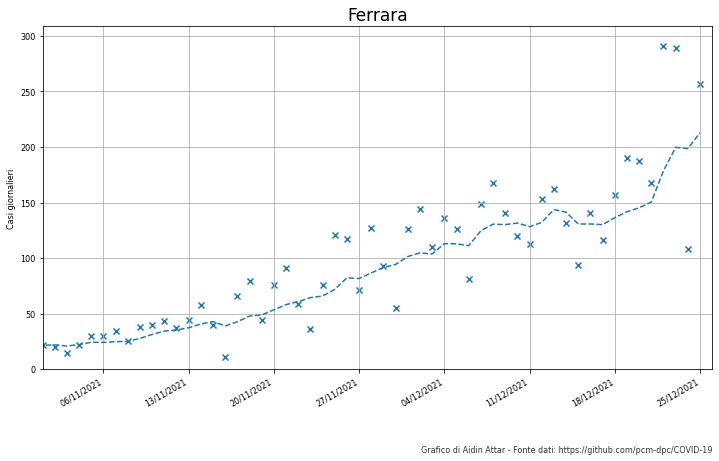

In [49]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(Province['Ferrara']['data'], Province['Ferrara']['casi_giornalieri'], marker='x',label = 'Casi giornalieri')
ax.plot(Province['Ferrara']['data'], Province['Ferrara']['media_casi_giorn'], linestyle='dashed',label = 'Media Mobile casi giornalieri')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_title('Ferrara', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.set_xlim([date(2021, 11, 1).strftime('%d/%m/%Y'), today])
ax.set_ylim(bottom=0)
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()


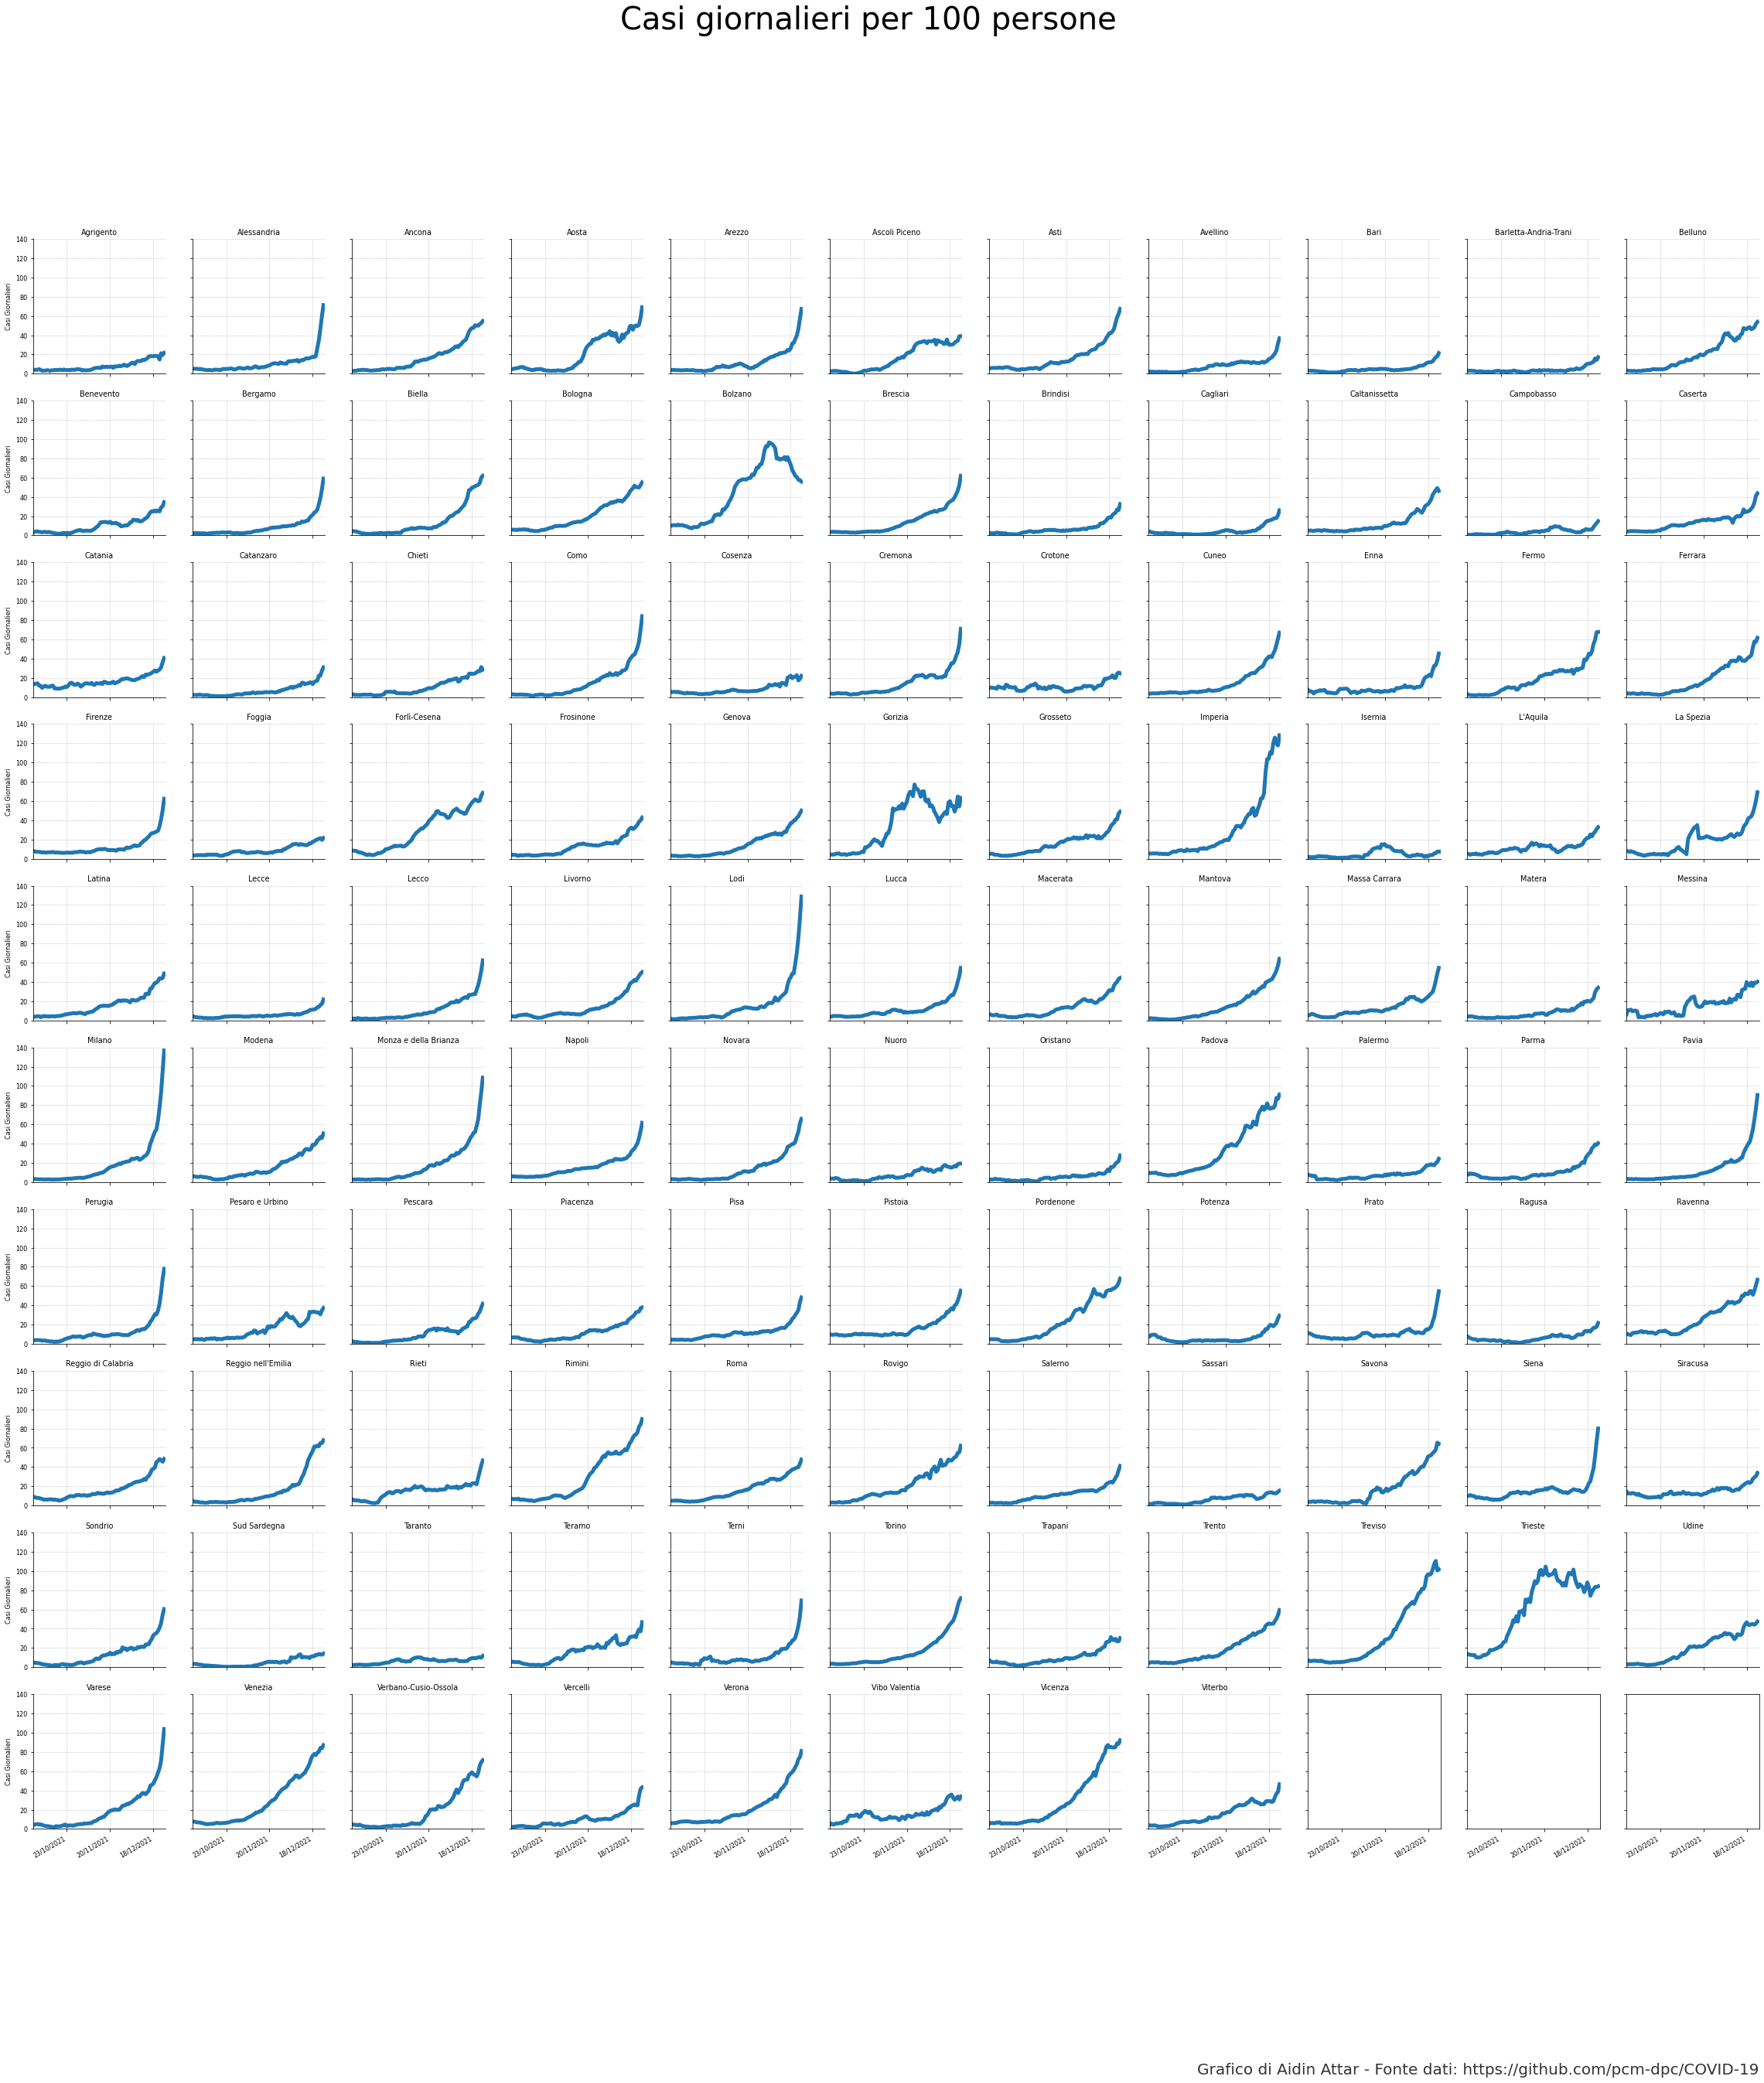

In [53]:
fig, ax = plt.subplots(nrows=10, ncols=11, sharey=True, sharex=True, figsize=(40, 42))

x = 0
y = 0
for key in Province.keys():
    if key != 'In fase di definizione/aggiornamento' and key != 'Fuori Regione / Provincia Autonoma':
        ax[y,x].plot(Province[key]['data'], Province[key]['media_casi_giorn_norm'], linewidth=5)
        ax[y,x].set_title(key)
        ax[y,x].spines['right'].set_visible(False)
        ax[y,x].spines['top'].set_visible(False)
        ax[y,x].spines['left'].set_visible(True)
        ax[y,x].spines['bottom'].set_visible(True)
        ax[y,x].grid(linestyle='dotted')
        #ax[y,x].axis('off')
        x += 1
        if x == 11:
            y +=1
            x = 0
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Casi Giornalieri')
ax[1,0].set_ylabel('Casi Giornalieri')
ax[2,0].set_ylabel('Casi Giornalieri')
ax[3,0].set_ylabel('Casi Giornalieri')
ax[4,0].set_ylabel('Casi Giornalieri')
ax[5,0].set_ylabel('Casi Giornalieri')
ax[6,0].set_ylabel('Casi Giornalieri')
ax[7,0].set_ylabel('Casi Giornalieri')
ax[8,0].set_ylabel('Casi Giornalieri')
ax[9,0].set_ylabel('Casi Giornalieri')
fig.autofmt_xdate()
fig.suptitle("Casi giornalieri per 100 persone", fontsize=40)
ax[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax[0,0].set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today])
ax[0,0].set_ylim([0, 140])
plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=20, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

In [9]:
NomiRegioni = regioni.denominazione_regione.unique()
PopoRegioni = [1312000,562869,1947000,5802000,4459000,1215000,5879000,1551000,10060000,1525000,305617,520891,538223,4356000,4029000,1640000,5000000,3730000,882015,125666,4906000]
DictRegioni = dict(zip(NomiRegioni, PopoRegioni))

#create a data frame dictionary to store your data frames
Regioni = {elem : pd.DataFrame for elem in NomiRegioni}
for key in Regioni.keys():
    Regioni[key] = regioni[:][regioni.denominazione_regione == key]
    Regioni[key]['data']                  = pd.to_datetime(Regioni[key]['data'],format='%Y-%m-%dT%H:%M:%S',yearfirst=True, dayfirst=True)
    Regioni[key]['new_date']              = Regioni[key]['data'].dt.date
    Regioni[key]                          = Regioni[key].set_index('new_date')
    Regioni[key].sort_index(inplace=True)
    Regioni[key]                          = Regioni[key].reindex(idx)
    Regioni[key].index                    = Regioni[key].index.strftime('%d/%m/%Y')

    Regioni[key]['casi_giornalieri']         = Regioni[key]['totale_casi'] - Regioni[key]['totale_casi'].shift(1)
    Regioni[key]['media_casi_giorn']         = Regioni[key]['casi_giornalieri'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['morti_giornalieri']        = Regioni[key]['deceduti'] - Regioni[key]['deceduti'].shift(1)
    Regioni[key]['media_morti_giorn']        = Regioni[key]['morti_giornalieri'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['casi_giornalieri_norm']    = Regioni[key]['casi_giornalieri'] / DictRegioni[key] * 1e5
    Regioni[key]['media_casi_giorn_norm']    = Regioni[key]['media_casi_giorn'] / DictRegioni[key] * 1e5
    Regioni[key]['morti_giornalieri_norm']   = Regioni[key]['morti_giornalieri'] / DictRegioni[key] * 1e5
    Regioni[key]['media_morti_giorn_norm']   = Regioni[key]['media_morti_giorn'] / DictRegioni[key] * 1e5

    Regioni[key]['tamponi_giornalieri']      = Regioni[key]['tamponi'] - Regioni[key]['tamponi'].shift(1)
    Regioni[key]['media_tamponi']            = Regioni[key]['tamponi_giornalieri'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tasso_positivi']           = Regioni[key]['casi_giornalieri'] / Regioni[key]['tamponi_giornalieri'] * 100
    Regioni[key].drop(Regioni[key][Regioni[key].tasso_positivi < 0].index, inplace=True)
    Regioni[key]['media_tasso_positivi']     = Regioni[key]['tasso_positivi'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tamponi_giornalieri_norm'] = Regioni[key]['tamponi_giornalieri'] / DictRegioni[key] * 1e5
    Regioni[key]['media_tamponi_giorn_norm'] = Regioni[key]['media_tamponi'] / DictRegioni[key] * 1e5

    Regioni[key]['casi_testati_giorn']       = Regioni[key]['casi_testati'] - Regioni[key]['casi_testati'].shift(1)
    Regioni[key]['media_casi_testati']       = Regioni[key]['casi_testati_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tasso_casi']               = Regioni[key]['casi_giornalieri'] / Regioni[key]['casi_testati_giorn'] * 100
    Regioni[key].drop(Regioni[key][Regioni[key].tasso_casi < 0].index, inplace=True)
    Regioni[key]['media_tasso_casi']         = Regioni[key]['tasso_casi'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['casi_testati_norm']        = Regioni[key]['casi_testati_giorn'] / DictRegioni[key] * 1e5
    Regioni[key]['media_casi_testati_norm']  = Regioni[key]['media_casi_testati'] / DictRegioni[key] * 1e5

    Regioni[key]['tamponi_test_molecolare_giorn']         = Regioni[key]['tamponi_test_molecolare']         - Regioni[key]['tamponi_test_molecolare'].shift(1)
    Regioni[key]['media_tamponi_test_molecolare_giorn'] = Regioni[key]['tamponi_test_molecolare_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['totale_positivi_test_molecolare_giorn'] = Regioni[key]['totale_positivi_test_molecolare'] - Regioni[key]['totale_positivi_test_molecolare'].shift(1)
    Regioni[key]['media_pos_molecolare']                  = Regioni[key]['totale_positivi_test_molecolare_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tasso_molecolare']                      = Regioni[key]['totale_positivi_test_molecolare_giorn'] / Regioni[key]['tamponi_test_molecolare_giorn'] * 100
    Regioni[key].drop(Regioni[key][Regioni[key].tasso_molecolare < 0].index, inplace=True)
    Regioni[key]['media_tasso_molecolare']                = Regioni[key]['tasso_molecolare'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tamponi_test_molecolare_giorn_norm']        = Regioni[key]['tamponi_test_molecolare_giorn'] / DictRegioni[key] * 1e5
    Regioni[key]['media_tamponi_test_molecolare_giorn_norm']  = Regioni[key]['media_tamponi_test_molecolare_giorn'] / DictRegioni[key] * 1e5

    Regioni[key]['tamponi_test_antigenico_rapido_giorn']  = Regioni[key]['tamponi_test_antigenico_rapido']  - Regioni[key]['tamponi_test_antigenico_rapido'].shift(1)
    Regioni[key]['media_test_antigenico_rapido_giorn'] = Regioni[key]['tamponi_test_antigenico_rapido_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['totale_positivi_test_antigenico_rapido_giorn'] = Regioni[key]['totale_positivi_test_antigenico_rapido'] - Regioni[key]['totale_positivi_test_antigenico_rapido'].shift(1)
    Regioni[key]['media_pos_antigenico_rapido']                  = Regioni[key]['totale_positivi_test_antigenico_rapido_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tasso_antigenico_rapido']                      = Regioni[key]['totale_positivi_test_antigenico_rapido_giorn'] / Regioni[key]['tamponi_test_antigenico_rapido_giorn'] * 100
    Regioni[key].drop(Regioni[key][Regioni[key].tasso_antigenico_rapido < 0].index, inplace=True)
    Regioni[key]['media_tasso_antigenico_rapido']                = Regioni[key]['tasso_antigenico_rapido'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tamponi_test_antigenico_rapido_giorn_norm']        = Regioni[key]['tamponi_test_antigenico_rapido_giorn'] / DictRegioni[key] * 1e5
    Regioni[key]['media_test_antigenico_rapido_giorn_norm']  = Regioni[key]['media_test_antigenico_rapido_giorn'] / DictRegioni[key] * 1e5

    Regioni[key]['media_ingressi_terapia_intensiva'] = Regioni[key]['ingressi_terapia_intensiva'].rolling(window=7, min_periods=1).mean()


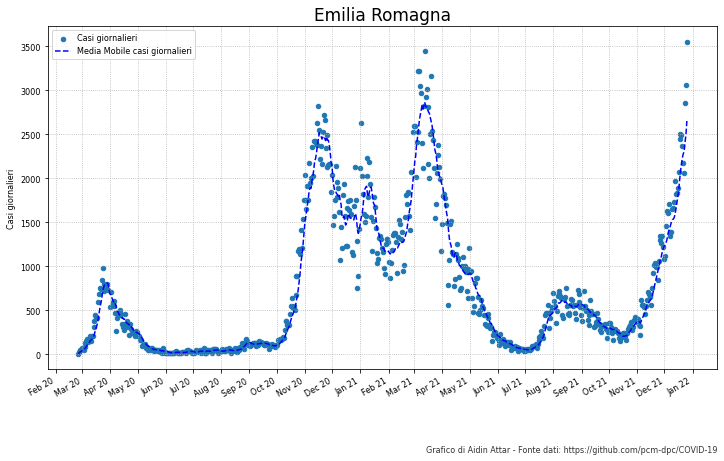

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))

Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='casi_giornalieri',
                               kind='scatter', label='Casi giornalieri',  color='C0')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_casi_giorn'],
        color = 'blue', label = 'Media Mobile casi giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Emilia Romagna', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(linestyle='dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

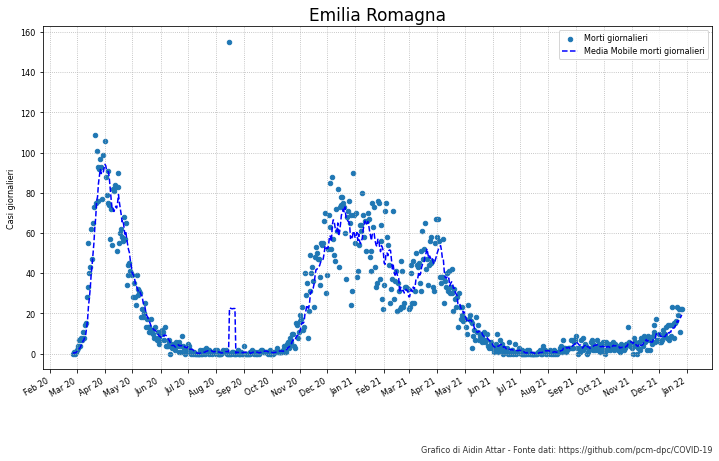

In [11]:
fig, ax = plt.subplots(figsize=(12, 7))

Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='morti_giornalieri',
                               kind='scatter', label='Morti giornalieri',  color='C0')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_morti_giorn'],
        color = 'blue', label = 'Media Mobile morti giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Emilia Romagna', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(linestyle='dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
ax.legend()
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

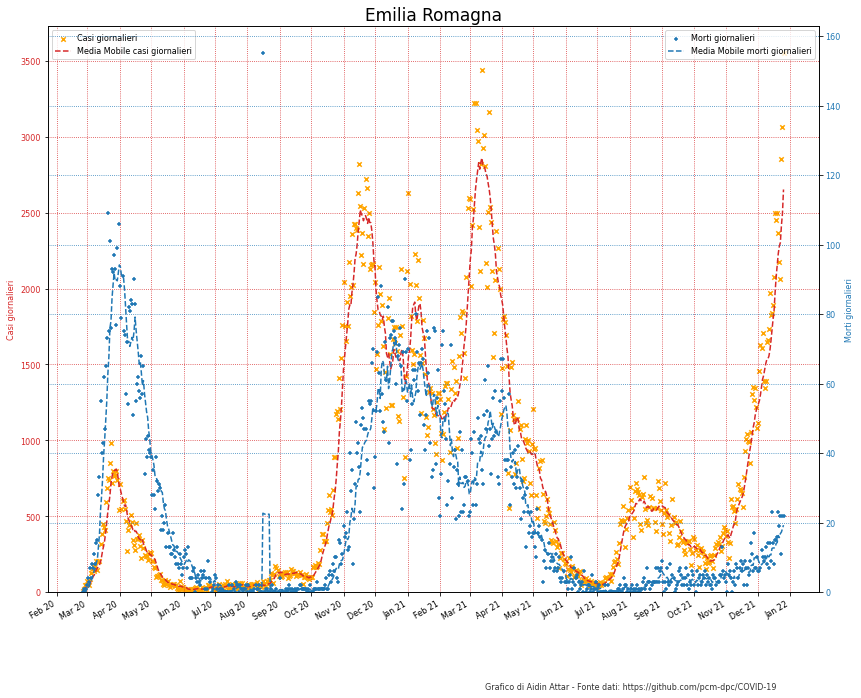

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Casi giornalieri', color=color)
Regioni['Emilia-Romagna'].plot(ax=ax1, x ='data', y='casi_giornalieri',
                               kind='scatter', label='Casi giornalieri',  color='orange',
                               marker='x', ylabel='Casi giornalieri', xlabel='')
ax1.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_casi_giorn'],
        color = color, label = 'Media Mobile casi giornalieri', linestyle='dashed')

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Morti giornalieri', color=color)

Regioni['Emilia-Romagna'].plot(ax=ax2, x ='data', y='morti_giornalieri',
                               kind='scatter', label='Morti giornalieri',  color='C0',
                               marker='+', ylabel='Morti giornalieri', xlabel='')
ax2.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_morti_giorn'],
        color = color, label = 'Media Mobile morti giornalieri', linestyle='dashed')

fig.autofmt_xdate()
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.set_title('Emilia Romagna', fontsize=17)
plt.rcParams['font.size'] = '8'
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.legend(loc='upper right')

ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [13]:
italia['casi_giornalieri']                 = italia['totale_casi'] - italia['totale_casi'].shift(1)
italia['media_casi_giorn']                 = italia['casi_giornalieri'].rolling(window=7, min_periods=1).mean()
italia['morti_giornalieri']                = italia['deceduti'] - italia['deceduti'].shift(1)
italia['media_morti_giorn']                = italia['morti_giornalieri'].rolling(window=7, min_periods=1).mean()
italia['media_ingressi_terapia_intensiva'] = italia['ingressi_terapia_intensiva'].rolling(window=7, min_periods=1).mean()


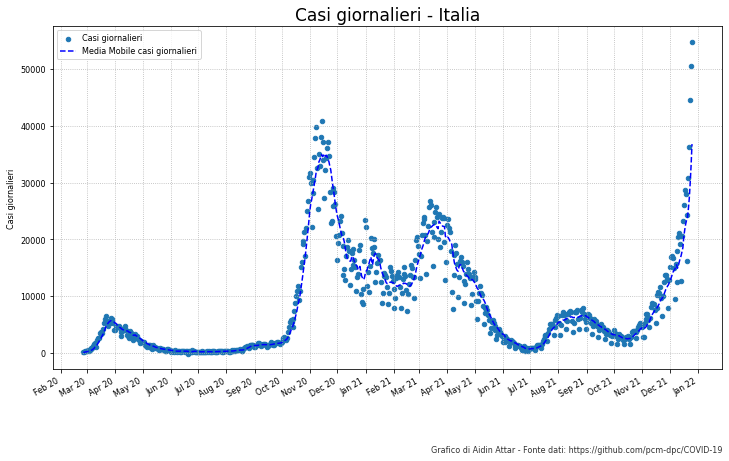

In [14]:
fig, ax = plt.subplots(figsize=(12, 7))

italia.plot(ax=ax, x ='data', y='casi_giornalieri',
                               kind='scatter', label='Casi giornalieri',  color='C0')
ax.plot(italia['data'], italia['media_casi_giorn'],
        color = 'blue', label = 'Media Mobile casi giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Casi giornalieri - Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(linestyle='dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

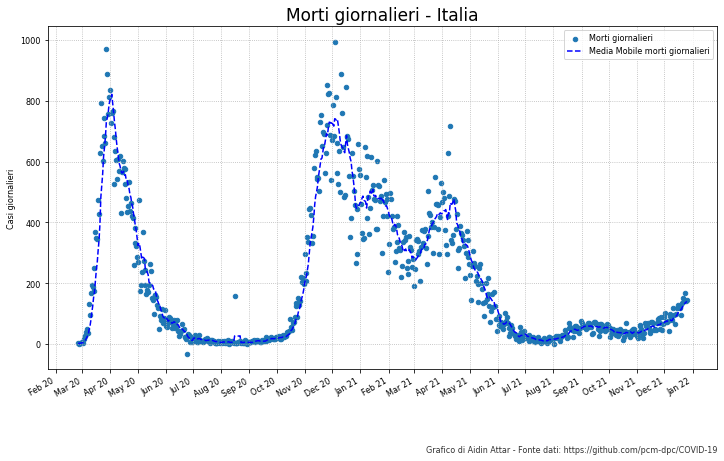

In [15]:
fig, ax = plt.subplots(figsize=(12, 7))

italia.plot(ax=ax, x ='data', y='morti_giornalieri',
            kind='scatter', label='Morti giornalieri',  color='C0')
ax.plot(italia['data'], italia['media_morti_giorn'],
        color = 'blue', label = 'Media Mobile morti giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Morti giornalieri - Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(linestyle='dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

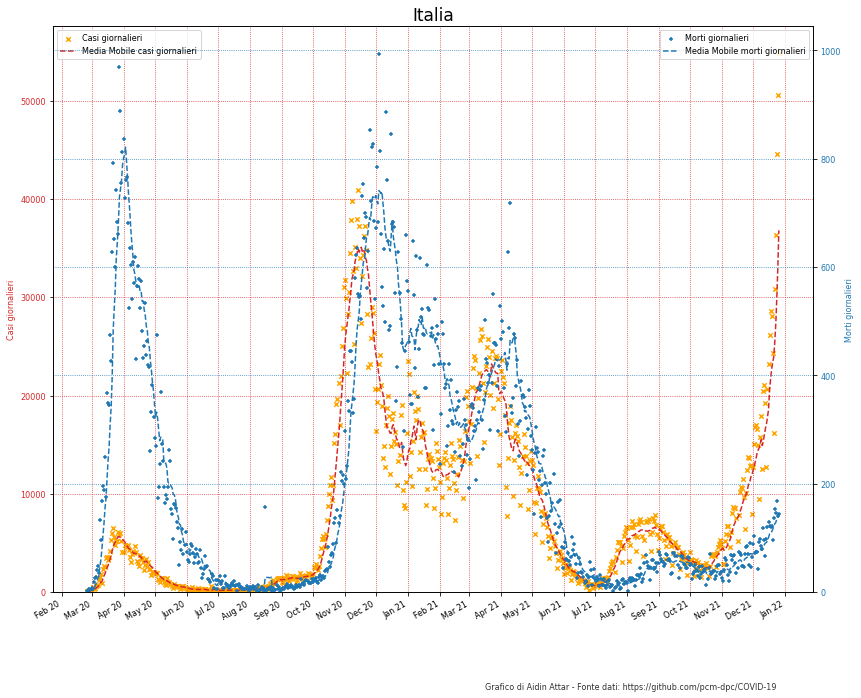

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Casi giornalieri', color=color)
italia.plot(ax=ax1, x ='data', y='casi_giornalieri', 
                               kind='scatter', label='Casi giornalieri',  color='orange',
                               marker='x', ylabel='Casi giornalieri', xlabel='')
ax1.plot(italia['data'], italia['media_casi_giorn'],
        color = color, label = 'Media Mobile casi giornalieri', linestyle='dashed')

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Morti giornalieri', color=color)

italia.plot(ax=ax2, x ='data', y='morti_giornalieri', 
                               kind='scatter', label='Morti giornalieri',  color='C0',
                               marker='+', ylabel='Morti giornalieri', xlabel='')
ax2.plot(italia['data'], italia['media_morti_giorn'],
        color = color, label = 'Media Mobile morti giornalieri', linestyle='dashed')

fig.autofmt_xdate()
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.set_title('Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.legend(loc='upper right')

ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


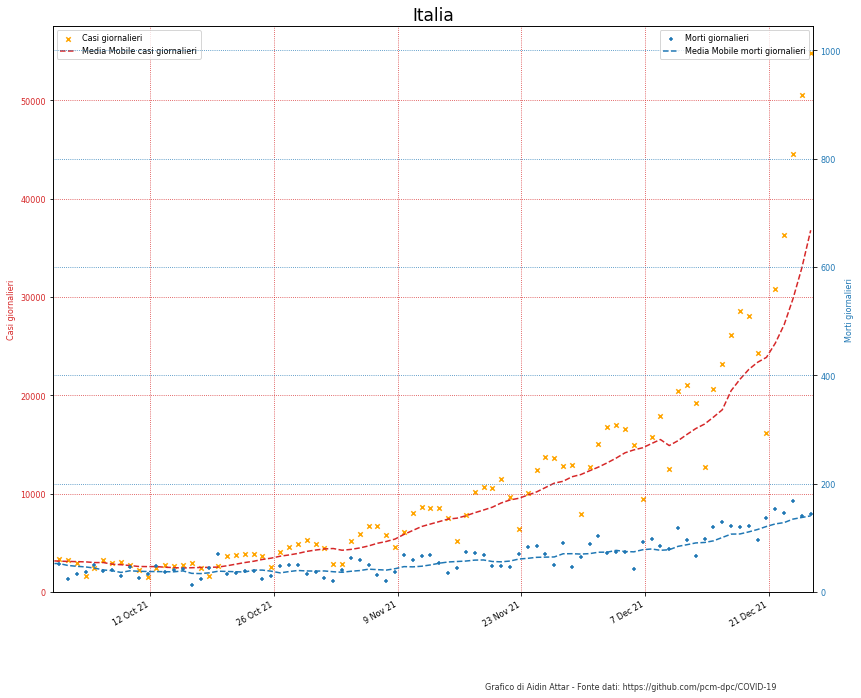

In [54]:
today = datetime.today()
yesterday = (date.today() - timedelta(days=1))
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Casi giornalieri', color=color)
italia.plot(ax=ax1, x ='data', y='casi_giornalieri',
            kind='scatter', label='Casi giornalieri',  color='orange',
            marker='x', ylabel='Casi giornalieri', xlabel='')
ax1.plot(italia['data'], italia['media_casi_giorn'],
         color = color, label = 'Media Mobile casi giornalieri', linestyle='dashed')

ax1.set_xlim([date(2021, 10, 1), today])
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%-d %b %y"))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter("%-d %b %y"))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Morti giornalieri', color=color)

italia.plot(ax=ax2, x ='data', y='morti_giornalieri',
                               kind='scatter', label='Morti giornalieri',  color='C0',
                               marker='+', ylabel='Morti giornalieri', xlabel='')
ax2.plot(italia['data'], italia['media_morti_giorn'],
        color = color, label = 'Media Mobile morti giornalieri', linestyle='dashed')

fig.autofmt_xdate()
#ax2.set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today])
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax1.set_title('Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

#ax2.set_xlim([date(2021, 11, 1).strftime('%d/%m/%Y'), today])
ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [18]:
italia['tamponi_giornalieri'] = italia['tamponi'] - italia['tamponi'].shift(1)
italia['media_tamponi']       = italia['tamponi_giornalieri'].rolling(window=7, min_periods=1).mean()
italia['tasso_positivi']      = italia['casi_giornalieri'] / italia['tamponi_giornalieri'] * 100
italia.drop(italia[italia.tasso_positivi < 0].index, inplace=True)
italia['media_tasso_positivi']     = italia['tasso_positivi'].rolling(window=7, min_periods=1).mean()

italia['casi_testati_giorn'] = italia['casi_testati'] - italia['casi_testati'].shift(1)
italia['media_casi_testati'] = italia['casi_testati_giorn'].rolling(window=7, min_periods=1).mean()
italia['tasso_casi']         = italia['casi_giornalieri'] / italia['casi_testati_giorn'] * 100
italia.drop(italia[italia.tasso_casi < 0].index, inplace=True)
italia['media_tasso_casi']   = italia['tasso_casi'].rolling(window=7, min_periods=1).mean()

italia['tamponi_test_molecolare_giorn']         = italia['tamponi_test_molecolare']         - italia['tamponi_test_molecolare'].shift(1)
italia['media_tamponi_test_molecolare_giorn'] = italia['tamponi_test_molecolare_giorn'].rolling(window=7, min_periods=1).mean()
italia['totale_positivi_test_molecolare_giorn'] = italia['totale_positivi_test_molecolare'] - italia['totale_positivi_test_molecolare'].shift(1)
italia['media_pos_molecolare']                  = italia['totale_positivi_test_molecolare_giorn'].rolling(window=7, min_periods=1).mean()
italia['tasso_molecolare']                      = italia['totale_positivi_test_molecolare_giorn'] / italia['tamponi_test_molecolare_giorn'] * 100
italia.drop(italia[italia.tasso_molecolare < 0].index, inplace=True)
italia['media_tasso_molecolare']                = italia['tasso_molecolare'].rolling(window=7, min_periods=1).mean()

italia['tamponi_test_antigenico_rapido_giorn']  = italia['tamponi_test_antigenico_rapido']  - italia['tamponi_test_antigenico_rapido'].shift(1)
italia['media_test_antigenico_rapido_giorn'] = italia['tamponi_test_antigenico_rapido_giorn'].rolling(window=7, min_periods=1).mean()
italia['totale_positivi_test_antigenico_rapido_giorn'] = italia['totale_positivi_test_antigenico_rapido'] - italia['totale_positivi_test_antigenico_rapido'].shift(1)
italia['media_pos_antigenico_rapido']                  = italia['totale_positivi_test_antigenico_rapido_giorn'].rolling(window=7, min_periods=1).mean()
italia['tasso_antigenico_rapido']                      = italia['totale_positivi_test_antigenico_rapido_giorn'] / italia['tamponi_test_antigenico_rapido_giorn'] * 100
italia.drop(italia[italia.tasso_molecolare < 0].index, inplace=True)
italia['media_tasso_antigenico_rapido']                = italia['tasso_antigenico_rapido'].rolling(window=7, min_periods=1).mean()



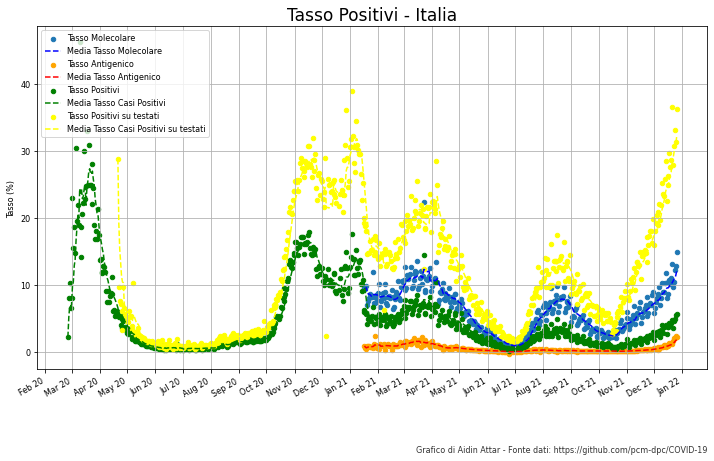

In [19]:
fig, ax = plt.subplots(figsize=(12, 7))

italia.plot(ax=ax, x ='data', y='tasso_molecolare',
                               kind='scatter', label='Tasso Molecolare',  color='C0')
ax.plot(italia['data'], italia['media_tasso_molecolare'],
        color = 'blue', label = 'Media Tasso Molecolare', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tasso_antigenico_rapido',
                               kind='scatter', label='Tasso Antigenico',  color='orange')
ax.plot(italia['data'], italia['media_tasso_antigenico_rapido'],
        color = 'red', label = 'Media Tasso Antigenico', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tasso_positivi',
                               kind='scatter', label='Tasso Positivi',  color='green')
ax.plot(italia['data'], italia['media_tasso_positivi'],
        color = 'green', label = 'Media Tasso Casi Positivi', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tasso_casi',
                               kind='scatter', label='Tasso Positivi su testati',  color='yellow')
ax.plot(italia['data'], italia['media_tasso_casi'],
        color = 'yellow', label = 'Media Tasso Casi Positivi su testati', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Tasso Positivi - Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Tasso (%)')
ax.set_xlabel("")
ax.legend(loc='upper left')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

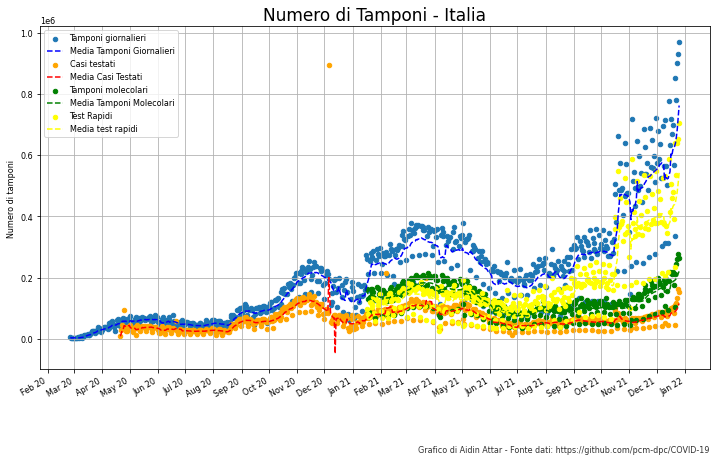

In [20]:
fig, ax = plt.subplots(figsize=(12, 7))

italia.plot(ax=ax, x ='data', y='tamponi_giornalieri',
                               kind='scatter', label='Tamponi giornalieri',  color='C0')
ax.plot(italia['data'], italia['media_tamponi'],
        color = 'blue', label = 'Media Tamponi Giornalieri', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='casi_testati_giorn',
                               kind='scatter', label='Casi testati',  color='orange')
ax.plot(italia['data'], italia['media_casi_testati'],
        color = 'red', label = 'Media Casi Testati', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tamponi_test_molecolare_giorn',
                               kind='scatter', label='Tamponi molecolari',  color='green')
ax.plot(italia['data'], italia['media_tamponi_test_molecolare_giorn'],
        color = 'green', label = 'Media Tamponi Molecolari', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tamponi_test_antigenico_rapido_giorn',
                               kind='scatter', label='Test Rapidi',  color='yellow')
ax.plot(italia['data'], italia['media_test_antigenico_rapido_giorn'],
        color = 'yellow', label = 'Media test rapidi', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Numero di Tamponi - Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Numero di tamponi')
ax.set_xlabel("")
ax.legend(loc='best')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

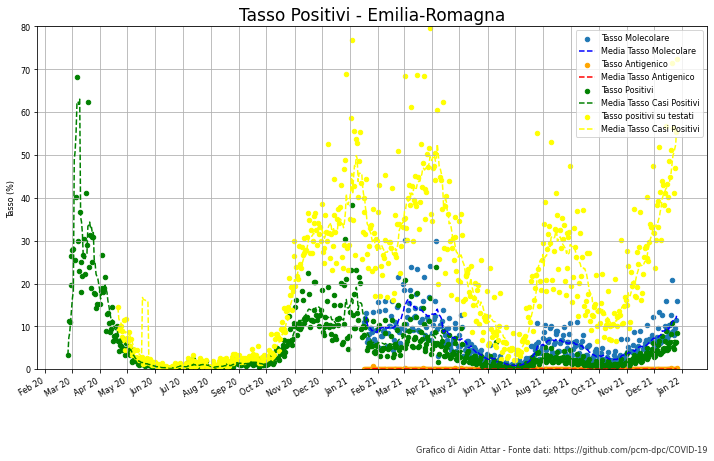

In [21]:
fig, ax = plt.subplots(figsize=(12, 7))

Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='tasso_molecolare',
                               kind='scatter', label='Tasso Molecolare',  color='C0')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_tasso_molecolare'],
        color = 'blue', label = 'Media Tasso Molecolare', linestyle='dashed')
Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='tasso_antigenico_rapido',
                               kind='scatter', label='Tasso Antigenico',  color='orange')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_tasso_antigenico_rapido'],
        color = 'red', label = 'Media Tasso Antigenico', linestyle='dashed')
Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='tasso_positivi',
                               kind='scatter', label='Tasso Positivi',  color='green')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_tasso_positivi'],
        color = 'green', label = 'Media Tasso Casi Positivi', linestyle='dashed')
Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='tasso_casi',
                               kind='scatter', label='Tasso positivi su testati',  color='yellow')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_tasso_casi'],
        color = 'yellow', label = 'Media Tasso Casi Positivi', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Tasso Positivi - Emilia-Romagna', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Tasso (%)')
ax.set_ylim([0,80])
ax.set_xlabel("")
ax.legend(loc='best')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

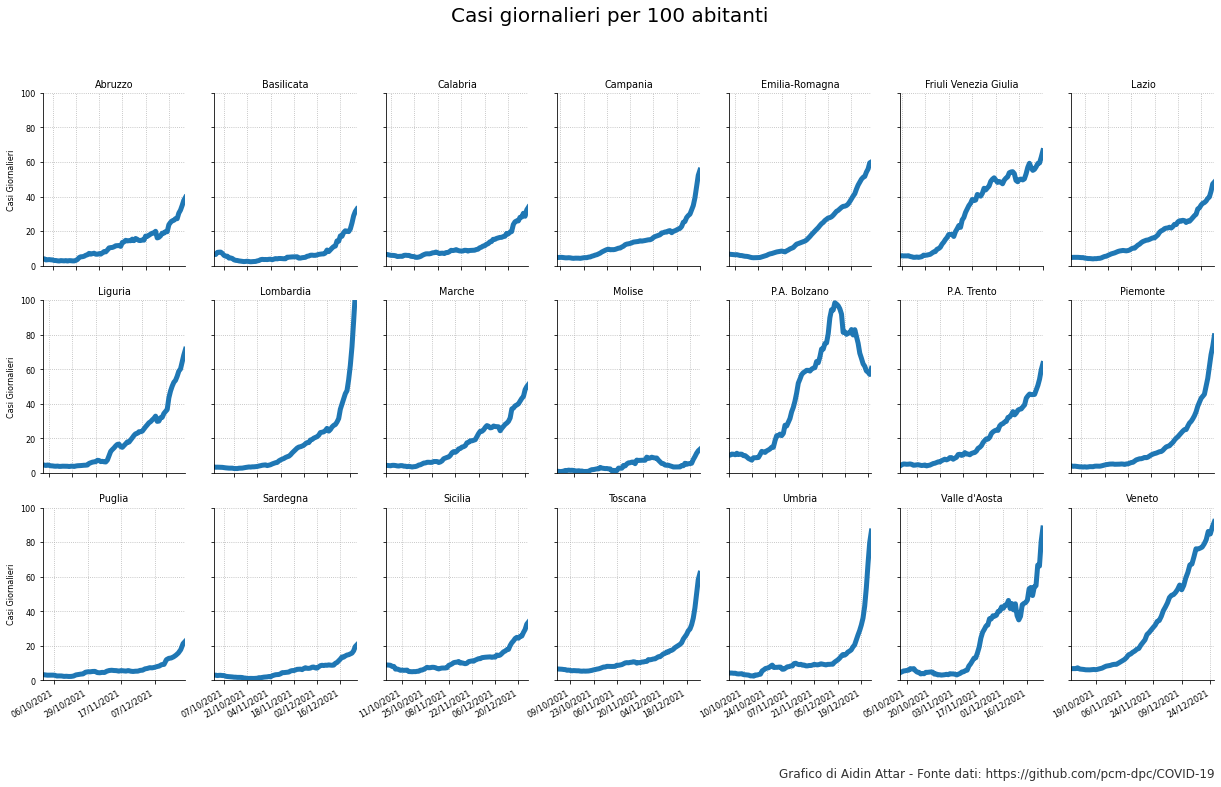

In [56]:
fig, ax = plt.subplots(nrows=3, ncols=7, sharey=True, figsize=(21, 12))

x = 0
y = 0
for key in Regioni.keys():
    ax[y,x].plot(Regioni[key].index, Regioni[key]['media_casi_giorn_norm'],c='C0', lw=5)
    #ax[y,x].plot(Regioni[key]['data'], Regioni[key]['media_morti_giorn_norm'],c='orange')
    ax[y,x].set_title(key)
    ax[y,x].grid(linestyle='dotted')
    ax[y,x].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    ax[y,x].set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today.strftime('%d/%m/%Y')])
    ax[y,x].spines['right'].set_visible(False)
    ax[y,x].spines['top'].set_visible(False)
    x += 1
    if x == 7:
        y +=1
        x = 0
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Casi Giornalieri')
ax[1,0].set_ylabel('Casi Giornalieri')
ax[2,0].set_ylabel('Casi Giornalieri')
fig.autofmt_xdate()
fig.suptitle("Casi giornalieri per 100 abitanti", fontsize=20)
ax[0,0].set_ylim([0, 100])

plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=12, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

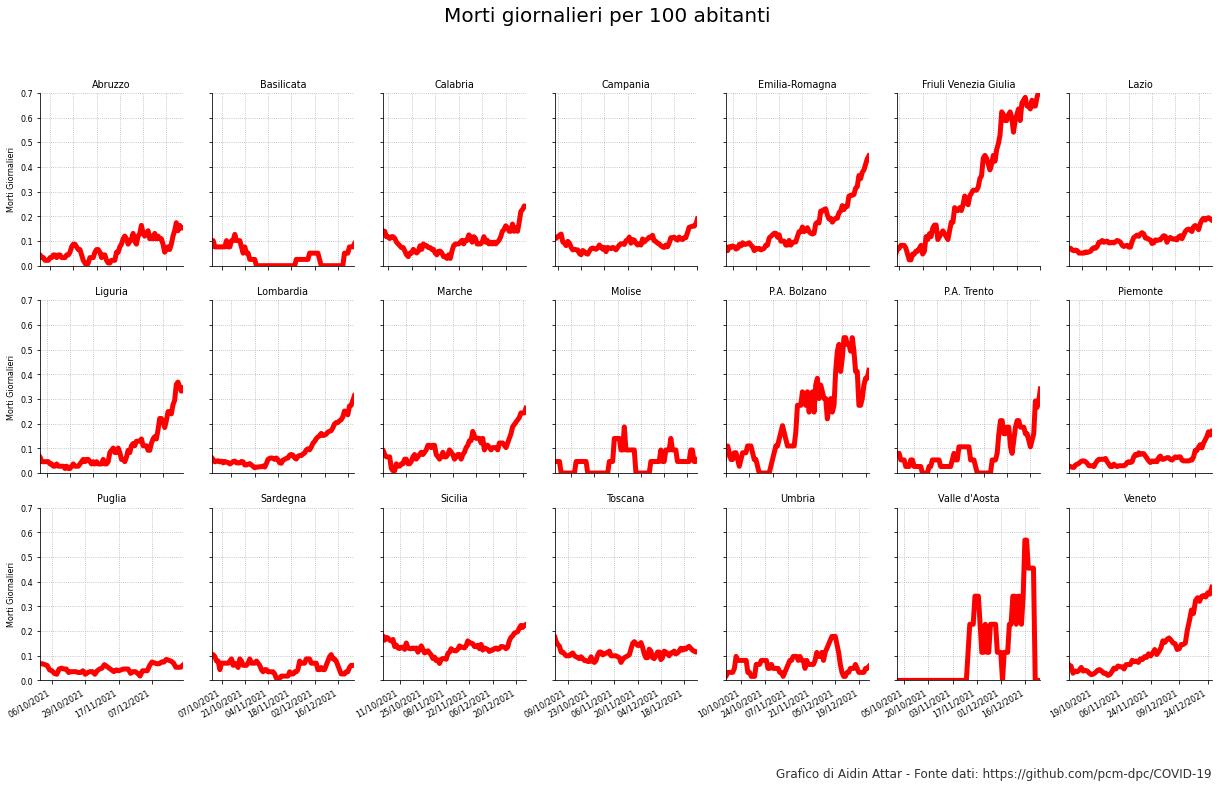

In [64]:
fig, ax = plt.subplots(nrows=3, ncols=7, sharey=True, figsize=(21, 12))

x = 0
y = 0
for key in Regioni.keys():
    #ax[y,x].plot(Regioni[key]['data'], Regioni[key]['media_casi_giorn_norm'],c='C0', lw=5)
    ax[y,x].plot(Regioni[key].index, Regioni[key]['media_morti_giorn_norm'],c='red', lw=5)
    ax[y,x].set_title(key)
    ax[y,x].grid(linestyle='dotted')
    ax[y,x].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    ax[y,x].set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today.strftime('%d/%m/%Y')])
    ax[y,x].spines['right'].set_visible(False)
    ax[y,x].spines['top'].set_visible(False)
    x += 1
    if x == 7:
        y +=1
        x = 0
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Morti Giornalieri')
ax[1,0].set_ylabel('Morti Giornalieri')
ax[2,0].set_ylabel('Morti Giornalieri')
fig.autofmt_xdate()
fig.suptitle("Morti giornalieri per 100 abitanti", fontsize=20)
ax[0,0].set_ylim(bottom=0, top=.7)
plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=12, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

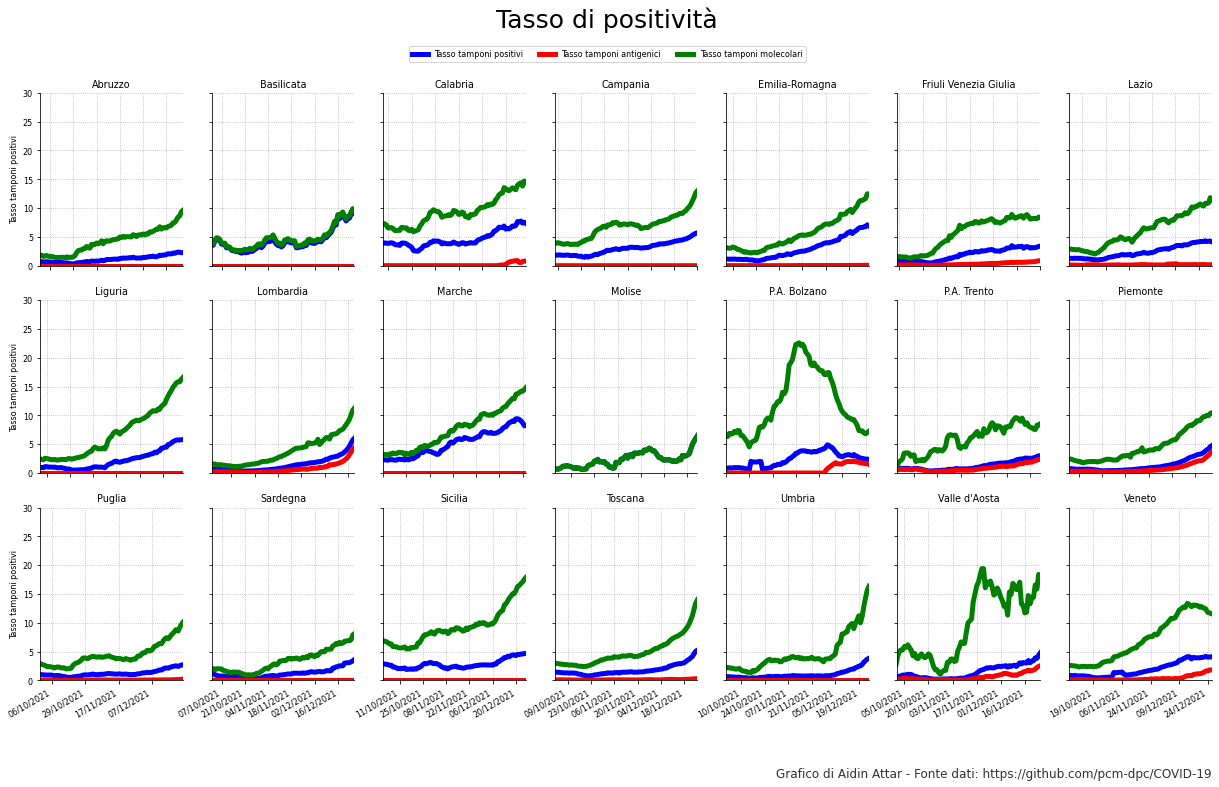

In [67]:
fig, ax = plt.subplots(nrows=3, ncols=7, sharey=True, figsize=(21, 12))

x = 0
y = 0
for key in Regioni.keys():
    #ax[y,x].plot(Regioni[key]['data'], Regioni[key]['media_casi_giorn_norm'],c='C0', lw=5)
    ax[y,x].plot(Regioni[key].index, Regioni[key]['media_tasso_positivi'],c='blue', lw=5)
    ax[y,x].plot(Regioni[key].index, Regioni[key]['media_tasso_antigenico_rapido'],c='red', lw=5)
    ax[y,x].plot(Regioni[key].index, Regioni[key]['media_tasso_molecolare'],c='green', lw=5)
    ax[y,x].set_title(key)
    ax[y,x].grid(linestyle='dotted')
    ax[y,x].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    ax[y,x].set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today.strftime('%d/%m/%Y')])
    ax[y,x].spines['right'].set_visible(False)
    ax[y,x].spines['top'].set_visible(False)
    x += 1
    if x == 7:
        y +=1
        x = 0
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Tasso tamponi positivi')
ax[1,0].set_ylabel('Tasso tamponi positivi')
ax[2,0].set_ylabel('Tasso tamponi positivi')
fig.autofmt_xdate()
fig.suptitle("Tasso di positività", fontsize=25)
ax[0,0].set_ylim(bottom=0, top=30)

labels = ['Tasso tamponi positivi', 'Tasso tamponi antigenici', 'Tasso tamponi molecolari']
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)
plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=12, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

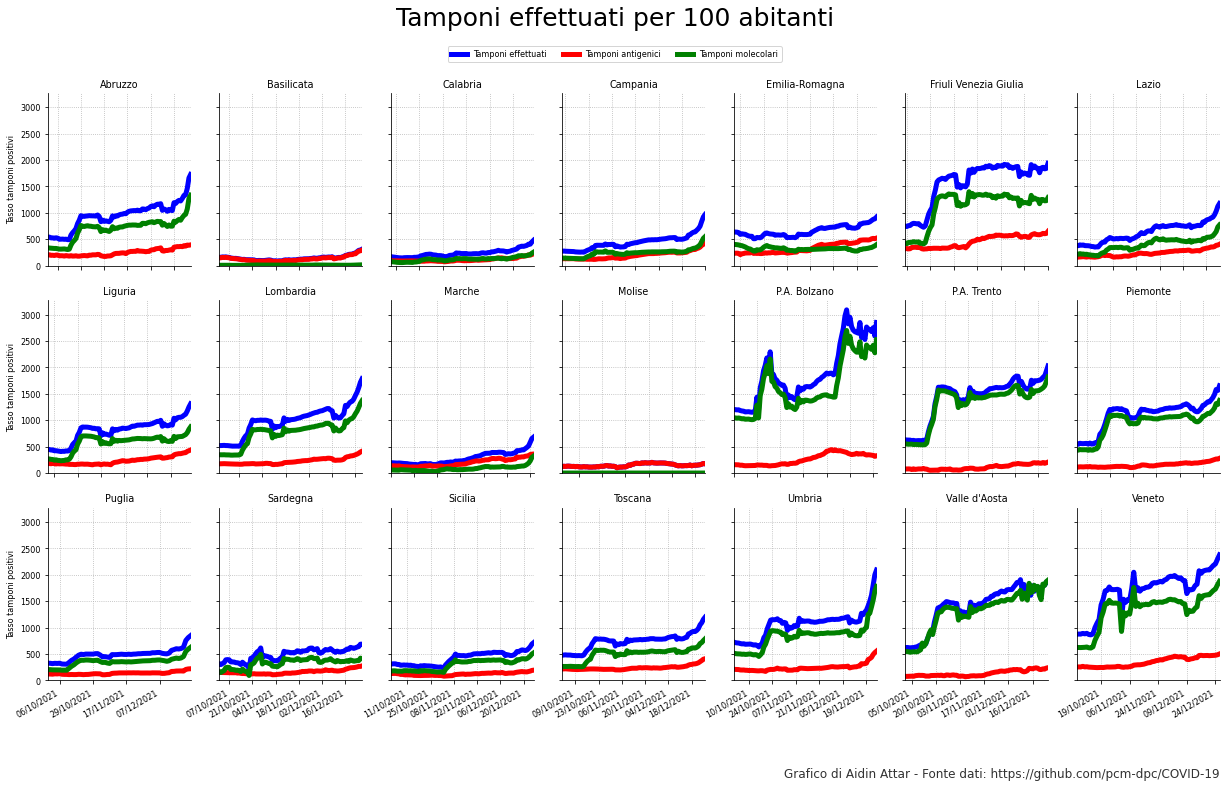

In [78]:
fig, ax = plt.subplots(nrows=3, ncols=7, sharey=True, figsize=(21, 12))

x = 0
y = 0
for key in Regioni.keys():
    ax[y,x].plot(Regioni[key].index, Regioni[key]['media_tamponi_giorn_norm'],c='blue', lw=5)
    ax[y,x].plot(Regioni[key].index, Regioni[key]['media_tamponi_test_molecolare_giorn_norm'],c='red', lw=5)
    ax[y,x].plot(Regioni[key].index, Regioni[key]['media_test_antigenico_rapido_giorn_norm'],c='green', lw=5)
    ax[y,x].set_title(key)
    ax[y,x].grid(linestyle='dotted')
    ax[y,x].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    ax[y,x].set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today.strftime('%d/%m/%Y')])
    ax[y,x].spines['right'].set_visible(False)
    ax[y,x].spines['top'].set_visible(False)
    x += 1
    if x == 7:
        y +=1
        x = 0
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Tasso tamponi positivi')
ax[1,0].set_ylabel('Tasso tamponi positivi')
ax[2,0].set_ylabel('Tasso tamponi positivi')
ax[0,0].set_ylim(bottom=0)
fig.autofmt_xdate()
fig.suptitle("Tamponi effettuati per 100 abitanti", fontsize=25)

labels = ['Tamponi effettuati', 'Tamponi antigenici', 'Tamponi molecolari']
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)
plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=12, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

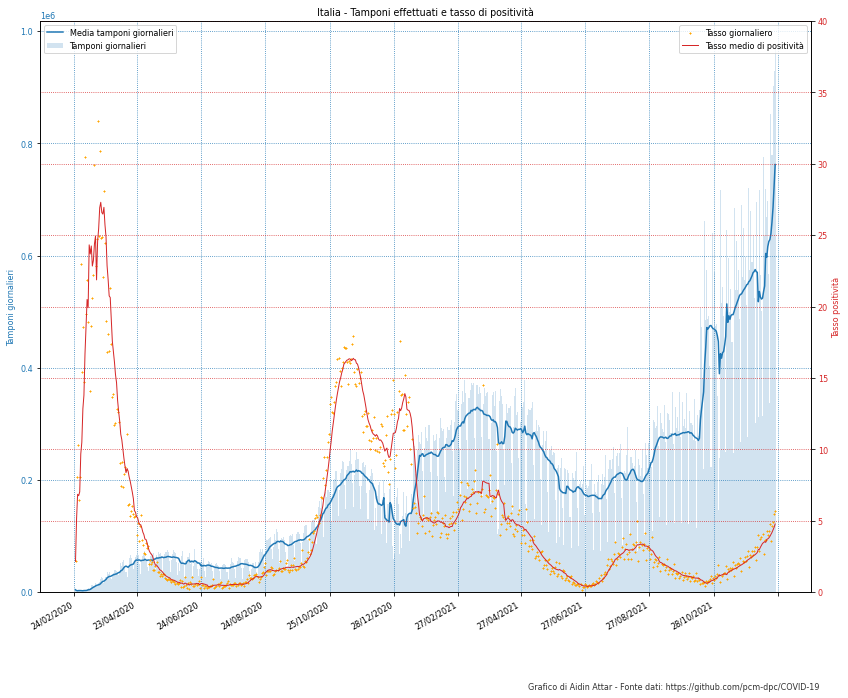

In [69]:
fig, ax1 = plt.subplots(figsize=(12,10))

color = 'tab:blue'
ax1.bar(italia.index, italia.tamponi_giornalieri,
        color='C0', width=1, label='Tamponi giornalieri', alpha=0.2)
ax1.plot(italia.index, italia.media_tamponi,
         color=color, label = 'Media tamponi giornalieri')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('Tamponi giornalieri', color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.set_title('Italia - Tamponi effettuati e tasso di positività')

#ax1.set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today])
ax1.grid(linestyle='dotted',color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'

ax2.scatter(x=italia.index, y=italia.tasso_positivi,
            color = 'orange', s = 1, marker = 'x', label = 'Tasso giornaliero')
ax2.plot(italia.index, italia.media_tasso_positivi,
         color = color, linewidth = 1, label = 'Tasso medio di positività')

fig.autofmt_xdate()
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(linestyle='dotted', color=color)

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Tasso positività', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#ax2.set_ylim(top=80)

plt.rcParams['font.size'] = '8'
plt.text(0.95, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

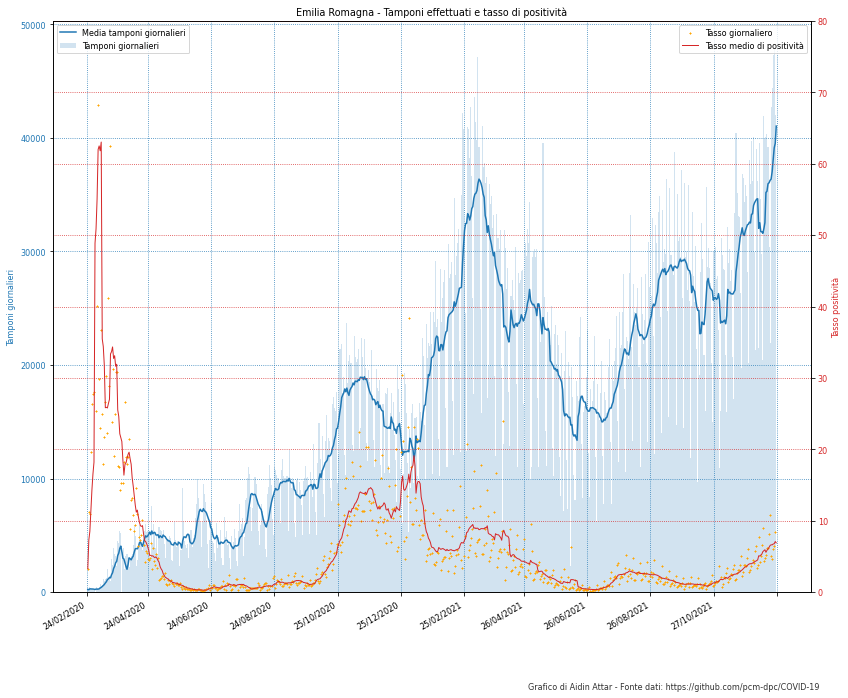

In [71]:
fig, ax1 = plt.subplots(figsize=(12,10))

color = 'tab:blue'
ax1.bar(Regioni['Emilia-Romagna'].index, Regioni['Emilia-Romagna'].tamponi_giornalieri,
        color='C0', width=1, label='Tamponi giornalieri', alpha=0.2)
ax1.plot(Regioni['Emilia-Romagna'].index, Regioni['Emilia-Romagna'].media_tamponi,
         color=color, label = 'Media tamponi giornalieri')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('Tamponi giornalieri', color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.set_title('Emilia Romagna - Tamponi effettuati e tasso di positività')

#ax1.set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today])
ax1.grid(linestyle='dotted',color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'

ax2.scatter(x=Regioni['Emilia-Romagna'].index, y=Regioni['Emilia-Romagna'].tasso_positivi,
            color = 'orange', s = 1, marker = 'x', label = 'Tasso giornaliero')
ax2.plot(Regioni['Emilia-Romagna'].index, Regioni['Emilia-Romagna'].media_tasso_positivi,
         color = color, linewidth = 1, label = 'Tasso medio di positività')

fig.autofmt_xdate()
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(linestyle='dotted', color=color)

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Tasso positività', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.set_ylim(top=80)

plt.rcParams['font.size'] = '8'
plt.text(0.95, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

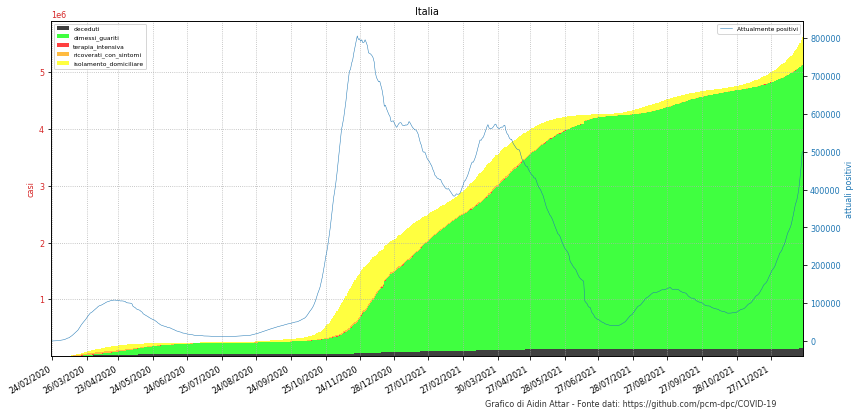

In [26]:
fig, ax1 = plt.subplots(figsize=(12,6))

italia[['deceduti',
        'dimessi_guariti',
        'terapia_intensiva',
        'ricoverati_con_sintomi',
        'isolamento_domiciliare']].plot.bar(ax=ax1, width = 1,stacked = True,
                                            color = ['black', 'lime', 'red', 'orange', 'yellow'],
                                            label = ['Decessi', 'Dimessi guariti', 'Terapie intensive', 'Ricoverati con sintomi', 'Isolamento domiciliare'],
                                            alpha = 0.75,
                                            xlabel='')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('casi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
italia.plot(ax = ax2, y='totale_positivi',
         kind = 'line',title = "Italia",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'Attualmente positivi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('attuali positivi', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.text(0.9, 0.07, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left', prop={'size': 6})
ax2.legend(loc='upper right',prop={'size': 6})

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

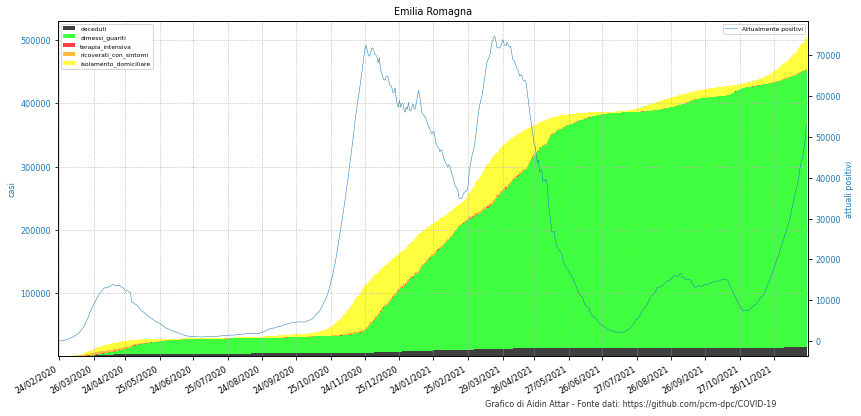

In [27]:
fig, ax1 = plt.subplots(figsize=(12,6))

Regioni['Emilia-Romagna'][['deceduti',
        'dimessi_guariti',
        'terapia_intensiva',
        'ricoverati_con_sintomi',
        'isolamento_domiciliare']].plot.bar(ax=ax1, width = 1,stacked = True,
                                            color = ['black', 'lime', 'red', 'orange', 'yellow'],
                                            label = ['Decessi', 'Dimessi guariti', 'Terapie intensive', 'Ricoverati con sintomi', 'Isolamento domiciliare'],
                                            alpha = 0.75,
                                            xlabel='')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('casi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
Regioni['Emilia-Romagna'].plot(ax = ax2, y='totale_positivi',
         kind = 'line',title = "Emilia Romagna",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'Attualmente positivi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('attuali positivi', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.text(0.9, 0.07, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left', prop={'size': 6})
ax2.legend(loc='upper right',prop={'size': 6})

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [28]:
'''
italia['incremento_casi_giornalieri']        = italia['casi_giornalieri']  / italia['casi_giornalieri' ].shift(7)
italia['incremento_morti_giornalieri']       = italia['morti_giornalieri'] / italia['morti_giornalieri'].shift(7)
italia['media_incremento_casi_giornalieri']  = italia['incremento_casi_giornalieri' ].rolling(window=20, min_periods=1).mean()
italia['media_incremento_morti_giornalieri'] = italia['incremento_morti_giornalieri'].rolling(window=20, min_periods=1).mean()

for key in Regioni.keys():
    Regioni[key]['incremento_casi_giornalieri']        = Regioni[key]['casi_giornalieri']  / Regioni[key]['casi_giornalieri' ].shift(7)
    Regioni[key]['incremento_morti_giornalieri']       = Regioni[key]['morti_giornalieri'] / Regioni[key]['morti_giornalieri'].shift(7)
    Regioni[key]['media_incremento_casi_giornalieri']  = Regioni[key]['incremento_casi_giornalieri' ].rolling(window=30, min_periods=1).mean()
    Regioni[key]['media_incremento_morti_giornalieri'] = Regioni[key]['incremento_morti_giornalieri'].rolling(window=30, min_periods=1).mean()

'''
italia['incremento_casi_giornalieri']        = italia['media_casi_giorn']  / italia['media_casi_giorn' ].shift(7)
italia['incremento_morti_giornalieri']       = italia['media_morti_giorn'] / italia['media_morti_giorn'].shift(7)
italia['media_incremento_casi_giornalieri']  = italia['incremento_casi_giornalieri' ].rolling(window=10, min_periods=1).mean()
italia['media_incremento_morti_giornalieri'] = italia['incremento_morti_giornalieri'].rolling(window=10, min_periods=1).mean()

for key in Regioni.keys():
    Regioni[key]['incremento_casi_giornalieri']        = Regioni[key]['media_casi_giorn']  / Regioni[key]['media_casi_giorn' ].shift(7)
    Regioni[key]['incremento_morti_giornalieri']       = Regioni[key]['media_morti_giorn'] / Regioni[key]['media_morti_giorn'].shift(7)
    Regioni[key]['media_incremento_casi_giornalieri']  = Regioni[key]['incremento_casi_giornalieri' ].rolling(window=10, min_periods=1).mean()
    Regioni[key]['media_incremento_morti_giornalieri'] = Regioni[key]['incremento_morti_giornalieri'].rolling(window=10, min_periods=1).mean()


italia

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi_test_antigenico_rapido_giorn,media_test_antigenico_rapido_giorn,totale_positivi_test_antigenico_rapido_giorn,media_pos_antigenico_rapido,tasso_antigenico_rapido,media_tasso_antigenico_rapido,incremento_casi_giornalieri,incremento_morti_giornalieri,media_incremento_casi_giornalieri,media_incremento_morti_giornalieri
24/02/2020,2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25/02/2020,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26/02/2020,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27/02/2020,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28/02/2020,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21/12/2021,2021-12-21 17:00:00,ITA,8381,1012,9393,374751,384144,14441,30798,4916068,...,640155.0,446085.857143,10186.0,5446.000000,1.591177,1.201487,1.422974,1.330317,1.310389,1.272144
22/12/2021,2021-12-22 17:00:00,ITA,8544,1010,9554,393175,402729,18585,36293,4933663,...,534224.0,463053.428571,10734.0,6357.571429,2.009270,1.338843,1.466683,1.273371,1.342076,1.277408
23/12/2021,2021-12-23 17:00:00,ITA,8722,1023,9745,420284,430029,27300,44595,4950780,...,639705.0,482311.857143,12692.0,7595.285714,1.984040,1.508307,1.456583,1.258667,1.371332,1.286121
24/12/2021,2021-12-24 17:00:00,ITA,8812,1038,9850,450824,460674,30645,50599,4970584,...,652085.0,509985.142857,15210.0,8914.285714,2.332518,1.655244,1.523504,1.283245,1.405911,1.295629


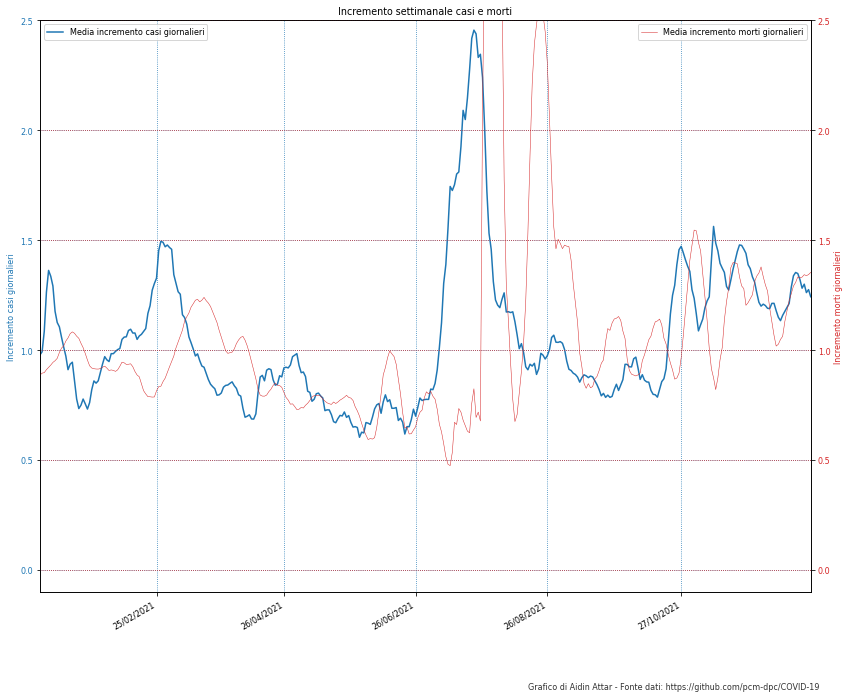

In [29]:
fig, ax1 = plt.subplots(figsize=(12,10))

color = 'tab:blue'
#ax1.scatter(x=Regioni['Emilia-Romagna'].index, y=Regioni['Emilia-Romagna'].incremento_casi_giornalieri,
#            s = 1, c = 'C0', marker = 'x', label = 'Incremento casi giornalieri')
ax1.plot(Regioni['Emilia-Romagna'].index, Regioni['Emilia-Romagna'].incremento_casi_giornalieri,
         color=color, label = 'Media incremento casi giornalieri')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('Incremento casi giornalieri', color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax1.set_xlim([date(2021, 1, 1).strftime('%d/%m/%Y'), today.strftime('%d/%m/%Y')])
ax1.grid(linestyle='dotted',color=color)
ax1.set_ylim(bottom = -0.1, top=2.5)
ax1.set_title('Incremento settimanale casi e morti')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'

#ax2.scatter(x=Regioni['Emilia-Romagna'].index, y=Regioni['Emilia-Romagna'].incremento_morti_giornalieri,
#            color = 'orange', s = 1, marker = '+', label = 'Incremento morti giornalieri')
ax2.plot(Regioni['Emilia-Romagna'].index, Regioni['Emilia-Romagna'].media_incremento_morti_giornalieri,
         color = color, linewidth = 0.5, label = 'Media incremento morti giornalieri')

fig.autofmt_xdate()
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(linestyle='dotted', color=color)
ax2.set_ylim(bottom = -0.1, top=2.5)

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Incremento morti giornalieri', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.rcParams['font.size'] = '8'
plt.text(0.95, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

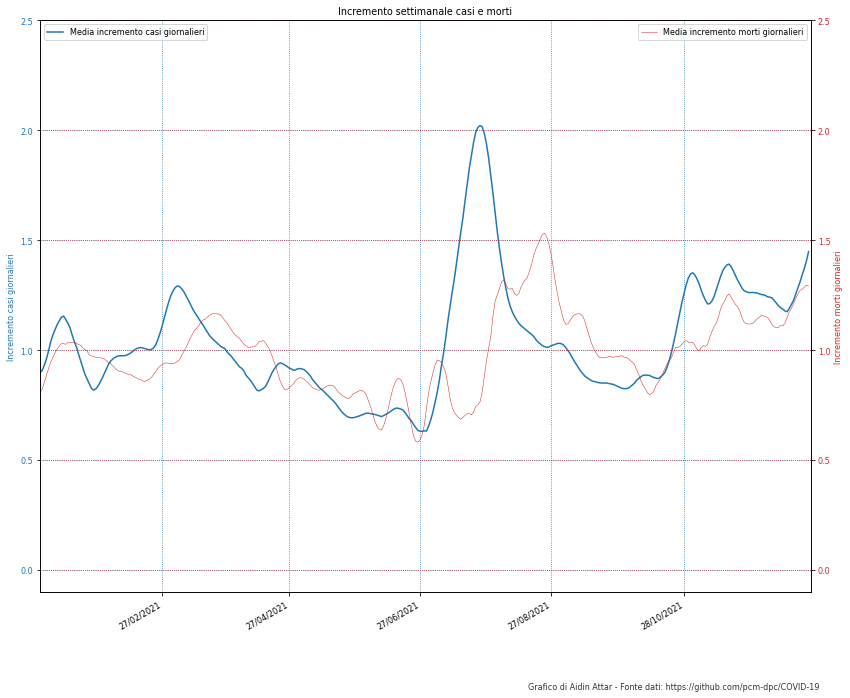

In [30]:
fig, ax1 = plt.subplots(figsize=(12,10))

color = 'tab:blue'
#ax1.scatter(x=italia.index, y=italia.incremento_casi_giornalieri,
#            s = 1, c = 'C0', marker = 'x', label = 'Incremento casi giornalieri')
ax1.plot(italia.index, italia.media_incremento_casi_giornalieri,
         color=color, label = 'Media incremento casi giornalieri')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('Incremento casi giornalieri', color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax1.set_xlim([date(2021, 1, 1).strftime('%d/%m/%Y'), today.strftime('%d/%m/%Y')])
ax1.grid(linestyle='dotted',color=color)
ax1.set_ylim(bottom = -0.1, top=2.5)
ax1.set_title('Incremento settimanale casi e morti')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'

#ax2.scatter(x=italia.index, y=italia.incremento_morti_giornalieri,
#            color = 'orange', s = 1, marker = '+', label = 'Incremento morti giornalieri')
ax2.plot(italia.index, italia.media_incremento_morti_giornalieri,
         color = color, linewidth = 0.5, label = 'Media incremento morti giornalieri')

fig.autofmt_xdate()
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(linestyle='dotted', color=color)
ax2.set_ylim(bottom = -0.1, top=2.5)

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Incremento morti giornalieri', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.rcParams['font.size'] = '8'
plt.text(0.95, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

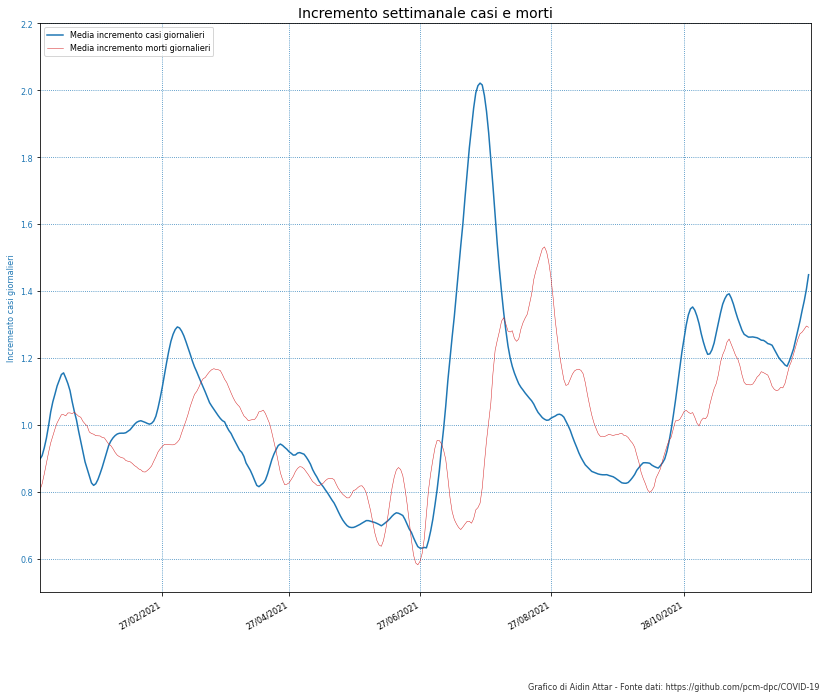

In [31]:
fig, ax1 = plt.subplots(figsize=(12,10))

color = 'tab:blue'
ax1.plot(italia.index, italia.media_incremento_casi_giornalieri,
         color=color, label = 'Media incremento casi giornalieri')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('Incremento casi giornalieri', color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax1.set_xlim([date(2021, 1, 1).strftime('%d/%m/%Y'), today.strftime('%d/%m/%Y')])
ax1.grid(linestyle='dotted',color=color)
ax1.set_ylim(bottom = .5, top=2.2)
ax1.set_title('Incremento settimanale casi e morti', fontsize=14)

color = 'tab:red'
ax1.plot(italia.index, italia.media_incremento_morti_giornalieri,
         color = color, linewidth = 0.5, label = 'Media incremento morti giornalieri')

fig.autofmt_xdate()
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.grid(linestyle='dotted', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Incremento morti giornalieri', color=color)  # we already handled the x-label with ax1
#ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.rcParams['font.size'] = '8'

plt.text(0.95, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

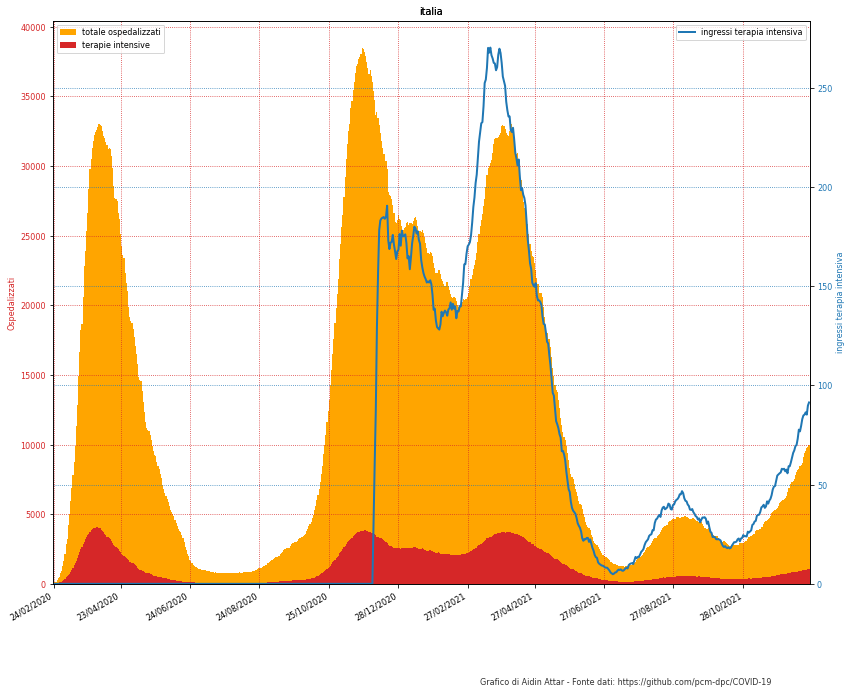

In [32]:
fig, ax1 = plt.subplots(figsize=(12,10))

color = 'tab:red'
italia.plot(ax = ax1, x ='data', y='totale_ospedalizzati',
            kind = 'bar', title = "italia", xlabel = '',
            color = 'orange', width = 1, label = 'totale ospedalizzati')
italia.plot(ax = ax1, x ='data', y='terapia_intensiva',
            kind = 'bar',xlabel = '', color = color,
            width = 1, label = 'terapie intensive')

ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('')
ax1.set_ylabel('Ospedalizzati', color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

#ax1.set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today])
ax1.grid(linestyle='dotted',color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
italia.plot(ax = ax2, y='media_ingressi_terapia_intensiva',
         kind = 'line',title = "italia",
         xlabel = '',  color=color,
         linewidth = 2, label = 'ingressi terapia intensiva')

fig.autofmt_xdate()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax2.set_xlabel('')
ax2.grid(linestyle='dotted', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('ingressi terapia intensiva', color=color)  # we already handled the x-label with ax1
#ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.rcParams['font.size'] = '12'
ax2.set_ylim(bottom = 0)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

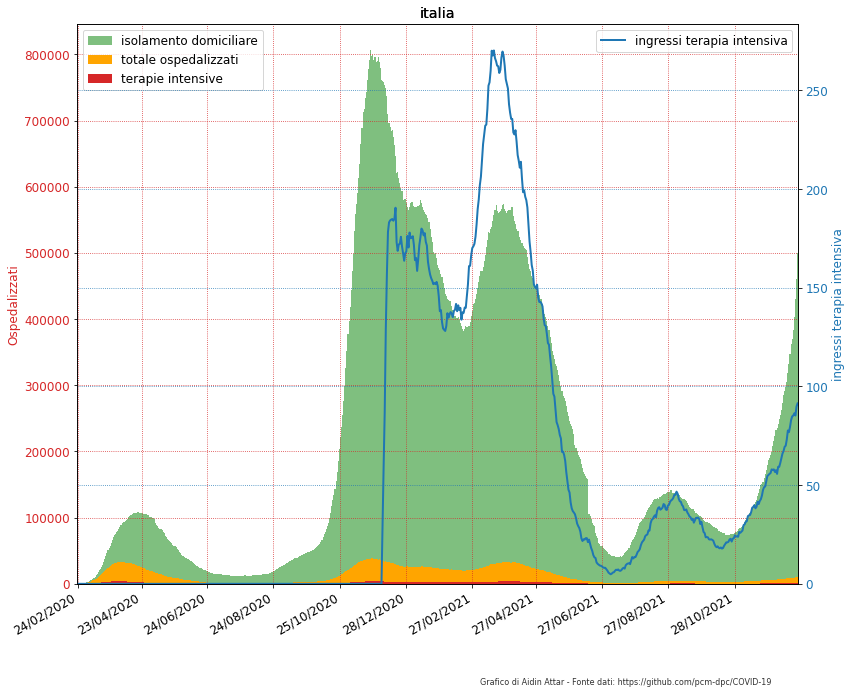

In [33]:
fig, ax1 = plt.subplots(figsize=(12,10))

color = 'tab:red'
italia.plot(ax = ax1, x ='data', y='totale_positivi',
            kind = 'bar',xlabel = '', color = 'green', alpha=0.5,
            width = 1, label = 'isolamento domiciliare')
italia.plot(ax = ax1, x ='data', y='totale_ospedalizzati',
            kind = 'bar', title = "italia", xlabel = '',
            color = 'orange', width = 1, label = 'totale ospedalizzati')
italia.plot(ax = ax1, x ='data', y='terapia_intensiva',
            kind = 'bar',xlabel = '', color = color,
            width = 1, label = 'terapie intensive')

ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('')
ax1.set_ylabel('Ospedalizzati', color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

#ax1.set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today])
ax1.grid(linestyle='dotted',color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
italia.plot(ax = ax2, y='media_ingressi_terapia_intensiva',
         kind = 'line',title = "italia",
         xlabel = '',  color=color,
         linewidth = 2, label = 'ingressi terapia intensiva')

fig.autofmt_xdate()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax2.set_xlabel('')
ax2.grid(linestyle='dotted', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('ingressi terapia intensiva', color=color)  # we already handled the x-label with ax1
#ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.rcParams['font.size'] = '12'
ax2.set_ylim(bottom = 0)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
italia['letalità'] = italia['avg_morti'] / italia['avg_casi'].shift(14)
italia